# Introduction to PyTorch

In [1]:
#Imports
#Pytorch
import torch
import torch.nn as nn
from torch.utils.data import Dataset, TensorDataset
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

#Sci-kit learn
import sklearn.model_selection

#Numpy
import numpy as np

#Matplotlib
import matplotlib.pyplot as plt

#Dataset
from mlxtend.data import mnist_data


## Exercise
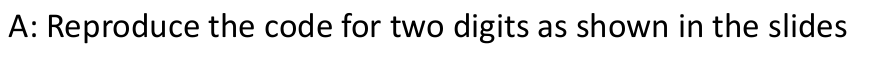

In [2]:
X, y = mnist_data()

keep = (y==0) | (y==1) #Keep only labeled data of 0 and 1
X = X[keep,:]
y = y[keep]

In [3]:
#Separate data into 70% training data and 30% test
Xtrain, Xtest, ytrain, ytest = sklearn.model_selection.train_test_split(X,y,test_size=0.3,shuffle=True)

In [4]:
#Prepare dataset
trainDataset = TensorDataset(torch.tensor(Xtrain).float(), torch.tensor(ytrain).float()) #Combine train data and train labels
testDataset = TensorDataset(torch.tensor(Xtest).float(), torch.tensor(ytest).float())

In [5]:
#Creating the network class
class logisticRegression(nn.Module): #this class inherits from nn.Module which is required to use PyTorch's model-building features
    def __init__(self): #Initialize layers and other properties
        super().__init__() #Call constructor of parent class nn.Module
        self.inputLayer=nn.Linear(784, 1, bias=True) #Defining a fully-connected (linear) layer with 784 inputs and 1 output
    
    def forward(self, x):
        x = self.inputLayer(x) #pass the data through the layer
        x = torch.sigmoid(x) #get the output with a sigmoid activation function
        return torch.squeeze(x)

In [6]:
#Testing the model with some random properly sized data
testData = torch.rand((20,784))
testNet = logisticRegression() #create an instance of the neural network
result = testNet.forward(testData) #train the model using the test data returning in this case the 20 outputs
result


tensor([0.4965, 0.4949, 0.4998, 0.4377, 0.5156, 0.5384, 0.4455, 0.5146, 0.4951,
        0.4498, 0.5218, 0.5560, 0.4869, 0.5289, 0.5162, 0.4085, 0.5177, 0.4805,
        0.5681, 0.5017], grad_fn=<SqueezeBackward0>)

In [7]:
#Setup proper traing of the model
nEpoch = 10 #How many times all trainig data is used to train the model
learningRate = 0.001
batchSize = 64 #Size of the training data batches
trainDataLoader = DataLoader(trainDataset, batch_size=batchSize, shuffle=True) #Dataloader handles the feeding of a batch size at a time

model_A = logisticRegression() #Initialize the model
optimizer = torch.optim.SGD(model_A.parameters(), lr=learningRate) #Using stochastic gradient descent to optimize (train) the network
loss_fn = nn.BCELoss() #Using binary cross entropy (BCE) 


accuracy = np.zeros(nEpoch)
for iEpoch in range(nEpoch):
    estimatedLabels = np.empty((0,))
    trueLabels = np.empty((0,))
    
    for xbatch, ybatch in trainDataLoader:
        y_pred = model_A(xbatch)
        loss = loss_fn(y_pred, ybatch)
        
        model_A.zero_grad() #Make gradient zero before running the back propagation
        loss.backward()
        optimizer.step()
        
        yhat = y_pred > 0.5 #Binary classification
        estimatedLabels = np.append(estimatedLabels, yhat)
        trueLabels = np.append(trueLabels, ybatch)
    accuracy[iEpoch] = np.mean(estimatedLabels==trueLabels)
    
accuracy #Print the training accuracy for each epoch

array([0.96428571, 0.99428571, 0.99571429, 0.99714286, 0.99714286,
       0.99714286, 0.99714286, 0.99714286, 0.99714286, 0.99714286])

In [8]:
testDataLoader = DataLoader(testDataset, batch_size=batchSize, shuffle=True)
estimatedLabels = np.empty((0,))
trueLabels = np.empty((0,))
for xbatch, ybatch in testDataLoader:
    y_pred = model_A(xbatch)
    
    yhat = y_pred > 0.5
    estimatedLabels = np.append(estimatedLabels, yhat)
    trueLabels = np.append(trueLabels, ybatch)
    
testAccuracy = np.mean(estimatedLabels==trueLabels)
print(testAccuracy)

0.9966666666666667


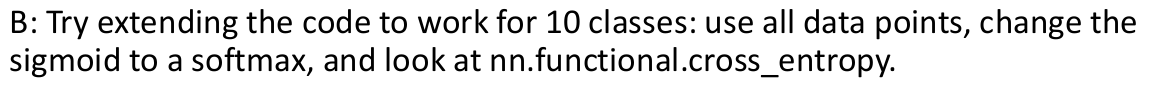

In [20]:
#Importing the data
X, y = mnist_data()
#Separate data into 70% training data and 30% testing data
Xtrain, Xtest, ytrain, ytest = sklearn.model_selection.train_test_split(X,y,test_size=0.3,shuffle=True)
#Prepare dataset
trainDataset = TensorDataset(torch.tensor(Xtrain).float(), torch.tensor(ytrain).float()) #Combine train data and train labels
testDataset = TensorDataset(torch.tensor(Xtest).float(), torch.tensor(ytest).float())

In [21]:
class myNet1(nn.Module): #this class inherits from nn.Module which is required to use PyTorch's model-building features
    def __init__(self): #Initialize layers and other properties
        super().__init__() #Call constructor of parent class nn.Module
        self.inputLayer=nn.Linear(784, 10, bias=True) #Defining a fully-connected (linear) layer with 784 inputs and 10 output (10 digits)
    
    def forward(self, x):
        x = self.inputLayer(x) #pass the data through the layer
        afunc = nn.Softmax(dim=0)
        x = afunc(x) #get the output with a softmax activation function
        return torch.squeeze(x)
    

0.6691428571428572


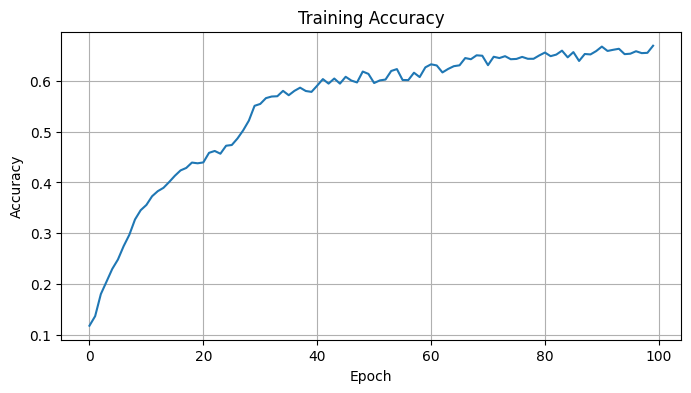

In [22]:
nEpoch = 100 #How many times all trainig data is used to train the model
learningRate = 0.001
batchSize = 64 #Size of the training data batches

trainDataLoader = DataLoader(trainDataset, batch_size=batchSize, shuffle=True) #Dataloader handles the feeding of a batch size at a time

model_B = myNet1() #Initialize the model

optimizer = torch.optim.SGD(model_B.parameters(), lr=learningRate) #Using stochastic gradient descent to optimize (train) the network

accuracy = np.zeros(nEpoch)

for iEpoch in range(nEpoch):
    estimatedLabels = np.empty((0,))
    trueLabels = np.empty((0,))
    
    for xbatch, ybatch in trainDataLoader:
        y_pred = model_B(xbatch)
        loss = nn.functional.cross_entropy(y_pred, ybatch.long()) #Calculate the loss using cross enrtopy
        
        model_B.zero_grad() #Make gradient zero before running the back propagation
        loss.backward()
        optimizer.step()
        
        yhat = torch.argmax(y_pred, dim=1) #What digit has the highest prediction
        estimatedLabels = np.append(estimatedLabels, yhat)
        trueLabels = np.append(trueLabels, ybatch)
    
    accuracy[iEpoch] = np.mean(estimatedLabels==trueLabels)
   
print(accuracy[-1]) #Print the training accuracy for the last epoch
xax = np.linspace(0, nEpoch-1, nEpoch)
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(xax, accuracy)
ax.set_title("Training Accuracy")
ax.set_xlabel("Epoch")
ax.set_ylabel("Accuracy")
ax.grid()
plt.show()

In [23]:
testDataLoader = torch.utils.data.DataLoader(testDataset, batch_size=batchSize, shuffle=True)

estimatedLabels = np.empty((0,))
trueLabels = np.empty((0,))
for Xbatch, ybatch in testDataLoader:
    y_pred = model_B(Xbatch)

    #Set yhat to the class with the highest probability
    yhat = torch.argmax(y_pred, dim=1)
    estimatedLabels = np.append(estimatedLabels, yhat)
    trueLabels = np.append(trueLabels, ybatch)

testAccuracy = np.mean(estimatedLabels == trueLabels)
print(testAccuracy)

0.6446666666666667


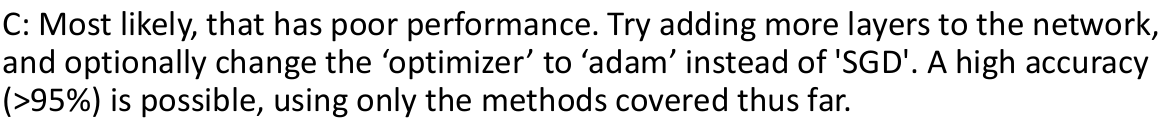

In [33]:
#Importing the data
X, y = mnist_data()
#Separate data into 70% training data and 30% testing data
Xtrain, Xtest, ytrain, ytest = sklearn.model_selection.train_test_split(X,y,test_size=0.3,shuffle=True)
#Prepare dataset
trainDataset = TensorDataset(torch.tensor(Xtrain).float(), torch.tensor(ytrain).float()) #Combine train data and train labels
testDataset = TensorDataset(torch.tensor(Xtest).float(), torch.tensor(ytest).float())

In [34]:
class myNet2(nn.Module): #this class inherits from nn.Module which is required to use PyTorch's model-building features
    def __init__(self): #Initialize layers and other properties
        super().__init__() #Call constructor of parent class nn.Module
        self.inputLayer = nn.Linear(784, 256, bias=True) #Defining a fully-connected (linear) layer with 784 inputs and 10 output (10 digits)
        self.layer_one = nn.Linear(256, 128, bias=True)
        self.layer_two = nn.Linear(128, 64, bias=True)
        self.layer_three = nn.Linear(64, 16, bias=True)
        self.outputLayer = nn.Linear(16, 10, bias=True)
        
    def forward(self, x):
        x = torch.relu(self.inputLayer(x)) #pass the data through the layer
        x = torch.relu(self.layer_one(x))
        x = torch.relu(self.layer_two(x))
        x = torch.relu(self.layer_three(x))
        x = torch.softmax(self.outputLayer(x), dim=1)
        return torch.squeeze(x)


0.9648571428571429


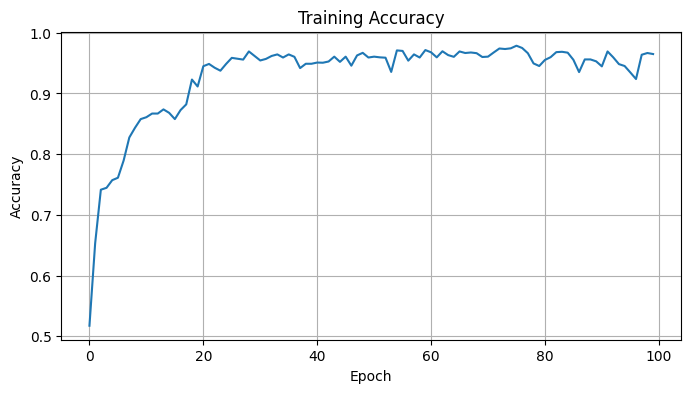

In [35]:
nEpoch = 100 #How many times all trainig data is used to train the model
learningRate = 0.001
batchSize = 64 #Size of the training data batches

trainDataLoader = DataLoader(trainDataset, batch_size=batchSize, shuffle=True) #Dataloader handles the feeding of a batch size at a time

model_C = myNet2() #Initialize the model

optimizer = torch.optim.Adam(model_C.parameters(), lr=learningRate) #Using stochastic gradient descent to optimize (train) the network

accuracy = np.zeros(nEpoch)

for iEpoch in range(nEpoch):
    estimatedLabels = np.empty((0,))
    trueLabels = np.empty((0,))
    
    for xbatch, ybatch in trainDataLoader:
        y_pred = model_C(xbatch)
        loss = nn.functional.cross_entropy(y_pred, ybatch.long()) #Calculate the loss using cross enrtopy
        
        model_C.zero_grad() #Make gradient zero before running the back propagation
        loss.backward()
        optimizer.step()
        
        yhat = torch.argmax(y_pred, dim=1) #What digit has the highest prediction
        estimatedLabels = np.append(estimatedLabels, yhat)
        trueLabels = np.append(trueLabels, ybatch)
    
    accuracy[iEpoch] = np.mean(estimatedLabels==trueLabels)
   
print(accuracy[-1]) #Print the training accuracy for the last epoch
xax = np.linspace(0, nEpoch-1, nEpoch)
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(xax, accuracy)
ax.set_title("Training Accuracy")
ax.set_xlabel("Epoch")
ax.set_ylabel("Accuracy")
ax.grid()
plt.show()

In [36]:
testDataLoader = DataLoader(testDataset, batch_size=batchSize, shuffle=True)
estimatedLabels = np.empty((0,))
trueLabels = np.empty((0,))
for xbatch, ybatch in testDataLoader:
    y_pred = model_C(xbatch)
    
    yhat = torch.argmax(y_pred, dim=1)
    estimatedLabels = np.append(estimatedLabels, yhat)
    trueLabels = np.append(trueLabels, ybatch)
    
testAccuracy = np.mean(estimatedLabels==trueLabels)
print(testAccuracy)

0.92


## Tensors and gradients

In [16]:
d1 = np.random.randn(2,3)
t1 = torch.tensor(d1, dtype=torch.float32)
d2 = t1.numpy()
print(d1, "\n", t1, "\n", d2)

[[-1.60394685 -0.61382888  0.17338763]
 [-1.95159184  1.29069875  0.28330548]] 
 tensor([[-1.6039, -0.6138,  0.1734],
        [-1.9516,  1.2907,  0.2833]]) 
 [[-1.6039468  -0.6138289   0.17338763]
 [-1.9515918   1.2906988   0.28330547]]


In [17]:
tzeros = torch.zeros([2,3], dtype=torch.int32)
tnumbers = torch.tensor([1,2,3], dtype=torch.int32)
print(tzeros, "\n", tnumbers)

tensor([[0, 0, 0],
        [0, 0, 0]], dtype=torch.int32) 
 tensor([1, 2, 3], dtype=torch.int32)


In [18]:
array = np.random.randn(2,3)
tensorFromNumpy = torch.tensor(array)
tNewShape = tensorFromNumpy.reshape((3,2))
print(tensorFromNumpy, "\n", tNewShape)

tensor([[-1.2765,  0.3732,  0.8774],
        [ 2.4515, -2.6298,  0.8779]], dtype=torch.float64) 
 tensor([[-1.2765,  0.3732],
        [ 0.8774,  2.4515],
        [-2.6298,  0.8779]], dtype=torch.float64)


In [19]:
w = torch.tensor(2.0, requires_grad=True)
x = torch.rand((2,2))
x2 = x*w
L = torch.sum(x2, axis=(0,1)) #Sum all element
print(w.grad) #Cannot print the gradient yet
L.retain_grad() #Tell torch to remember the gradient for this variable
x2.retain_grad()
L.backward(retain_graph=True) #Calculate the backpropagation of L
print(w.grad) #Can now print the gradient
print(x2.grad)
print(L.grad)

None
tensor(1.1334)
tensor([[1., 1.],
        [1., 1.]])
tensor(1.)


## Datasets and Dataloaders

In [20]:
#Easy way to quickly make a dataset and loader
data_tensor_X = torch.rand(2000,3,4) # 2000 random datapoints of size 3x4
data_tensor_y = torch.randint(low=0, high=4, size=(2000,)) #2000 labels for the datapoints (for classes)
trainDataset = TensorDataset(data_tensor_X, data_tensor_y) #Combining data and labels
trainDataloader = DataLoader(trainDataset, batch_size=32) #Configure the dataloader to load data in specific batch_sizes

In [21]:
#More general way of handling datasets and loaders
class datasetClass(Dataset):
    def __init__(self, initOptions):
        #Initialize
        None
    
    def __len__(self):
        #How much data
        None
    
    def __getitem__(self, idx):
        #returning a data point
        None
    

## Defining neural networks

In [22]:
class NeuralNetwork(nn.module):
    def __init__(self):
        super().__init__()
        # Define network layers
    
    def forward(self, x):
        #what should the network do to x to return the output
        return #output
    
    
    
        


AttributeError: module 'torch.nn' has no attribute 'module'